In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import re

%matplotlib inline

## Act Report Introduction

In this report, we observe three insights and one visualization from the final data set of this Dog Rating Tweet project. 

The first step is to import the data.

In [3]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,Unnamed: 0,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,doggo,floofer,pupper,puppo,new_name
0,0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,False,False,False,False,None
1,1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,False,False,False,False,None
2,2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,False,False,False,False,None
3,3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,False,False,False,False,None
4,4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,False,False,False,False,None


#### Insight 1

The data includes extracted names from the tweets. This data can be used to discover which dog names are most popular within the dataset.

In [5]:
df_master['name'].value_counts()[1:11]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Toby        7
Daisy       7
Name: name, dtype: int64

The most popular name is Charlie, followed by Oliver and Lucy.

#### Insight 2

The dataset includes all the ratings of the dogs, and with this data we can discover important statistics.

In [6]:
df_master['rating_value'] = df_master['rating_numerator'] / df_master['rating_denominator']

In [7]:
df_master['rating_value'].describe()

count    1994.000000
mean        1.169249
std         4.067071
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_value, dtype: float64

The average rating is `1.17`. The highest rating is `177.6` and the lowest is `0`.

#### Insight 3

The dog rater that created the data has four different levels of dog cuteness given in the texts. These are `doggo`, `floofer`, `pupper`, and `puppo`. Calculating `sum()` for these can tell us how often these designations are applied.

In [8]:
df_master['doggo'].sum()

74

In [9]:
df_master['floofer'].sum()

8

In [10]:
df_master['pupper'].sum()

212

In [11]:
df_master['puppo'].sum()

23

The most common dog level given to the rated dogs is `pupper`, with a value of `212`.

The next most common is `doggo`, with a value of `74`.

#### Visualization

Using the image prediction data, we can see which breeds of dogs are most commonly submitted from the audience for ratings.

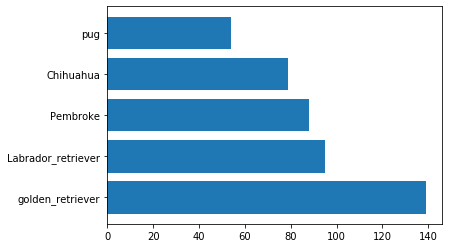

In [12]:
fig = df_master['p1'].value_counts()[:5].plot.barh(width=0.8).get_figure().savefig('visualization.png', dpi=300)

The most common dog breed featured, according to the dog prediction data provided, is `golden_retriever`, with a value of approximately `139`.